<a href="https://colab.research.google.com/github/Lutris98/21_1Q/blob/master/5.House/House_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.EDA

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
from google.colab import drive
drive.mount('/content/gdrive')
train_df=pd.read_csv('/content/gdrive/MyDrive/Dataset/house_train.csv')
test_df=pd.read_csv('/content/gdrive/MyDrive/Dataset/house_test.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [46]:
df=pd.concat([train_df,test_df],axis=0,ignore_index=True)

##1)Basic statistics

In [47]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0


In [48]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

##2)Basic feature selection


In [49]:
df.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu','Id'],axis=1,inplace=True) #features with too little data(logical thinking) #Surprisingly all data were meaningful by own meaning

##3)Encoding

In [50]:
object_df=df.select_dtypes('object') #get dataframe with specific dtypes
onehot=pd.DataFrame #makes nulls into seperate column
for feature in object_df.columns:
  onehot=pd.get_dummies(df[feature])
  df.drop([feature],axis=1,inplace=True)
  df=pd.concat([onehot,df],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 271 entries, Abnorml to SalePrice
dtypes: float64(12), int64(25), uint8(234)
memory usage: 1.5 MB


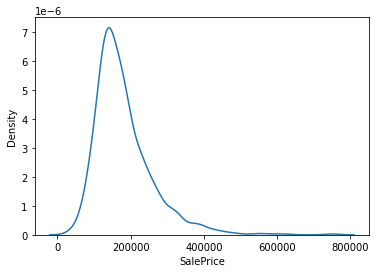

In [51]:
sns.kdeplot(data=df,x='SalePrice')

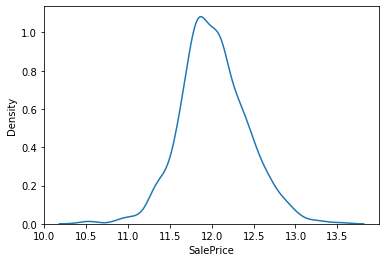

In [52]:
df['SalePrice']=pd.DataFrame(np.log1p(df['SalePrice']))
sns.kdeplot(data=df,x='SalePrice')

#2.Preprocessing(with Visualization)

##1)Imputation

In [53]:
df.drop(['SalePrice'],axis=1,inplace=False).isna().sum().sort_values(ascending=False).head(20) #reverses indice

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
GarageCars        1
BsmtFinSF2        1
BsmtFinSF1        1
TotalBsmtSF       1
BsmtUnfSF         1
GarageArea        1
Gd                0
TA                0
Fa                0
Ex                0
TA                0
Po                0
Gd                0
BrkTil            0
CBlock            0
dtype: int64

In [61]:
tempdf=pd.DataFrame()
tempdf=df.drop(['SalePrice'],axis=1,inplace=False)
imp=tempdf[tempdf.isna().sum()!=0].columns
print(imp)
for feature in imp:
  df[feature].fillna(df[feature].mode(),inplace=True) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ignored

##2)Scaling&Outlier removal

##3)feature selection

#3.Modeling

In [55]:
test_df=df[df['SalePrice'].isna()!=0]
train_df=df[df['SalePrice'].isna()==0]
target_df=train_df['SalePrice']
feature_df=train_df.drop(['SalePrice'],axis=1,inplace=False)
X_train,X_test,y_train,y_test=train_test_split(feature_df,target_df,test_size=0.2,random_state=42)

In [56]:
def get_eval(real,pred):
  eval=np.sqrt(mean_squred_error(real,np.log1p(pred))) #mse is embedded metric #only targetdata is logscaled 
  print('RMSLE:',eval)

In [57]:
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
pred1=lr_reg.predict(X_test)
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)
pred2=ridge_reg.predict(X_test)
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)
pred3=lasso_reg.predict(X_test)

ValueError: ignored

In [ ]:
get_eval(y_test,pred1)
get_eval(y_test,pred2)
get_eval(y_test,pred3)

#Uploading

#1)Feedback

#2)Afterwords
